# <div style="text-align: center"> HR Analytics Data Exploration and Cleaning </div>                               


####      <div style="text-align: right">  by- Lakshya Gupta & Abhiraj Singh</div>           

# Introduction
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. 

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [71]:
train=pd.read_csv("data/train.csv")

In [72]:
test = pd.read_csv("data/test.csv")

In [73]:
train.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [74]:
test.tail()

employee_id   department     region         education gender  \
23485        53478        Legal   region_2   Below Secondary      m   
23486        25600   Technology  region_25        Bachelor's      m   
23487        45409           HR  region_16        Bachelor's      f   
23488         1186  Procurement  region_31        Bachelor's      m   
23489         5973   Technology  region_17  Master's & above      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
23485            sourcing                1   24                   3.0   
23486            sourcing                1   31                   3.0   
23487            sourcing                1   26                   4.0   
23488            sourcing                3   27                   NaN   
23489               other                3   40                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
23485                  1              0            0                  61  
23486                  7              0            0                  74  
23487                  4              0            0                  50  
23488                  1              0            0                  70  
23489                  5              1            0                  89

In [75]:
describeDf=train.describe()
print(type(describeDf))
describeDf

<class 'pandas.core.frame.DataFrame'>


employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [76]:
y_train=train['is_promoted']
x_train=train.drop(columns=['is_promoted'])

In [77]:
print(x_train.index)
print(test.index)

RangeIndex(start=0, stop=54808, step=1)
RangeIndex(start=0, stop=23490, step=1)


In [78]:
append_file = x_train.append(test,ignore_index =True)

In [79]:
append_file.shape

(78298, 13)

In [10]:
#preprocess pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

dropColumnList= ['employee_id']
imputeList = ['education']
knnImputeList = ['previous_year_rating']
catColumnList=['department', 'region','education','gender','recruitment_channel']



# Preprocessing

* drop columns
* NA values of education
* KNN Impute for previous_year_rating
* onehot encoding

In [ ]:
def percentile(array):
    

In [55]:
append_file['department']

0        Sales & Marketing
1               Operations
2        Sales & Marketing
3        Sales & Marketing
4               Technology
               ...        
78293                Legal
78294           Technology
78295                   HR
78296          Procurement
78297           Technology
Name: department, Length: 78298, dtype: object

In [49]:
departmentVals=append_file['avg_training_score'][append_file['department']==append_file['department'][0]]
departmentVals.values

array([49, 50, 50, ..., 49, 49, 51], dtype=int64)

In [52]:
from scipy import stats

percentile=[]
for ind in append_file.index: 
    departmentVals=append_file['avg_training_score'][append_file['department']==append_file['department'][ind]].values
    perc =stats.percentileofscore(departmentVals, append_file['avg_training_score'][ind])
    percentile.append(perc)
     #print(append_file['department'][ind]) 
    #append_file['training_score_percentile']=append_file['avg_training_score']

In [80]:
append_file['spending_percentile']=percentile


In [81]:
append_file['work_fraction'] = append_file['length_of_service'] / append_file['age']

In [82]:
append_file

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
78293        53478              Legal   region_2   Below Secondary      m   
78294        25600         Technology  region_25        Bachelor's      m   
78295        45409                 HR  region_16        Bachelor's      f   
78296         1186        Procurement  region_31        Bachelor's      m   
78297         5973         Technology  region_17  Master's & above      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
78293            sourcing                1   24                   3.0   
78294            sourcing                1   31                   3.0   
78295            sourcing                1   26                   4.0   
78296            sourcing                3   27                   NaN   
78297               other                3   40                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8              1            0                  49   
1                      4              0            0                  60   
2                      7              0            0                  50   
3                     10              0            0                  50   
4                      2              0            0                  73   
...                  ...            ...          ...                 ...   
78293                  1              0            0                  61   
78294                  7              0            0                  74   
78295                  4              0            0                  50   
78296                  1              0            0                  70   
78297                  5              1            0                  89   

       spending_percentile  work_fraction  
0                41.579383       0.228571  
1                54.543198       0.133333  
2                55.555786       0.205882  
3                55.555786       0.256410  
4                 0.847374       0.044444  
...                    ...            ...  
78293            69.373315       0.041667  
78294             2.000197       0.225806  
78295            55.209820       0.153846  
78296            54.976373       0.037037  
78297            97.787959       0.125000  

[78298 rows x 15 columns]

In [60]:
append_file['spending_percentile'][append_file['department']=='Legal']

84       96.563342
156      88.241240
208      29.851752
257      93.665768
272      79.986523
           ...    
78065    56.704852
78095    93.665768
78198    56.704852
78283    69.373315
78293    69.373315
Name: spending_percentile, Length: 1484, dtype: float64

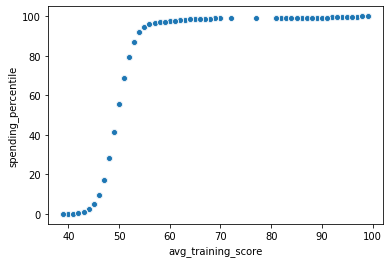

In [66]:
sns.scatterplot(append_file['avg_training_score'][append_file['department']=='Sales & Marketing'],append_file['spending_percentile'][append_file['department']=='Sales & Marketing'])

In [83]:
def preprocessing(data):
    
    data = data.drop(columns=['employee_id','avg_training_score'])   #drop columns
    
    for column in imputeList:
        data[column].fillna('unknown',inplace=True)
        
    data= pd.get_dummies(data) 
    
    data_columns=data.columns
    
    
    
    imputer = KNNImputer(n_neighbors=11)
    data=imputer.fit_transform(data)
    
    data=pd.DataFrame(data, columns=data_columns)
    
    return data

    
    

In [84]:
data=preprocessing(append_file)

In [85]:
data.shape

(78298, 60)

In [86]:
x_train=data.iloc[:y_train.shape[0],:]

In [87]:
x_train.shape

(54808, 60)

In [88]:
X_test=data.iloc[y_train.shape[0]:,:]

In [89]:
test

employee_id         department     region         education gender  \
0             8724         Technology  region_26        Bachelor's      m   
1            74430                 HR   region_4        Bachelor's      f   
2            72255  Sales & Marketing  region_13        Bachelor's      m   
3            38562        Procurement   region_2        Bachelor's      f   
4            64486            Finance  region_29        Bachelor's      m   
...            ...                ...        ...               ...    ...   
23485        53478              Legal   region_2   Below Secondary      m   
23486        25600         Technology  region_25        Bachelor's      m   
23487        45409                 HR  region_16        Bachelor's      f   
23488         1186        Procurement  region_31        Bachelor's      m   
23489         5973         Technology  region_17  Master's & above      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   24                   NaN   
1                   other                1   31                   3.0   
2                   other                1   31                   1.0   
3                   other                3   31                   2.0   
4                sourcing                1   30                   4.0   
...                   ...              ...  ...                   ...   
23485            sourcing                1   24                   3.0   
23486            sourcing                1   31                   3.0   
23487            sourcing                1   26                   4.0   
23488            sourcing                3   27                   NaN   
23489               other                3   40                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                      1              1            0                  77  
1                      5              0            0                  51  
2                      4              0            0                  47  
3                      9              0            0                  65  
4                      7              0            0                  61  
...                  ...            ...          ...                 ...  
23485                  1              0            0                  61  
23486                  7              0            0                  74  
23487                  4              0            0                  50  
23488                  1              0            0                  70  
23489                  5              1            0                  89  

[23490 rows x 13 columns]

In [116]:
X_test

no_of_trainings   age  previous_year_rating  length_of_service  \
54808              1.0  24.0              3.545455                1.0   
54809              1.0  31.0              3.000000                5.0   
54810              1.0  31.0              1.000000                4.0   
54811              3.0  31.0              2.000000                9.0   
54812              1.0  30.0              4.000000                7.0   
...                ...   ...                   ...                ...   
78293              1.0  24.0              3.000000                1.0   
78294              1.0  31.0              3.000000                7.0   
78295              1.0  26.0              4.000000                4.0   
78296              3.0  27.0              2.909091                1.0   
78297              3.0  40.0              5.000000                5.0   

       KPIs_met >80%  awards_won?  avg_training_score  department_Analytics  \
54808            1.0          0.0                77.0                   0.0   
54809            0.0          0.0                51.0                   0.0   
54810            0.0          0.0                47.0                   0.0   
54811            0.0          0.0                65.0                   0.0   
54812            0.0          0.0                61.0                   0.0   
...              ...          ...                 ...                   ...   
78293            0.0          0.0                61.0                   0.0   
78294            0.0          0.0                74.0                   0.0   
78295            0.0          0.0                50.0                   0.0   
78296            0.0          0.0                70.0                   0.0   
78297            1.0          0.0                89.0                   0.0   

       department_Finance  department_HR  ...  region_region_9  \
54808                 0.0            0.0  ...              0.0   
54809                 0.0            1.0  ...              0.0   
54810                 0.0            0.0  ...              0.0   
54811                 0.0            0.0  ...              0.0   
54812                 1.0            0.0  ...              0.0   
...                   ...            ...  ...              ...   
78293                 0.0            0.0  ...              0.0   
78294                 0.0            0.0  ...              0.0   
78295                 0.0            1.0  ...              0.0   
78296                 0.0            0.0  ...              0.0   
78297                 0.0            0.0  ...              0.0   

       education_Bachelor's  education_Below Secondary  \
54808                   1.0                        0.0   
54809                   1.0                        0.0   
54810                   1.0                        0.0   
54811                   1.0                        0.0   
54812                   1.0                        0.0   
...                     ...                        ...   
78293                   0.0                        1.0   
78294                   1.0                        0.0   
78295                   1.0                        0.0   
78296                   1.0                        0.0   
78297                   0.0                        0.0   

       education_Master's & above  education_unknown  gender_f  gender_m  \
54808                         0.0                0.0       0.0       1.0   
54809                         0.0                0.0       1.0       0.0   
54810                         0.0                0.0       0.0       1.0   
54811                         0.0                0.0       1.0       0.0   
54812                         0.0                0.0       0.0       1.0   
...                           ...                ...       ...       ...   
78293                         0.0                0.0       0.0       1.0   
78294                         0.0                0.0       0.0       1.0   
78295  

In [31]:
print(x_train.shape)
x_train.head(12)

(54808, 13)


employee_id         department     region         education gender  \
0         65438  Sales & Marketing   region_7  Master's & above      f   
1         65141         Operations  region_22        Bachelor's      m   
2          7513  Sales & Marketing  region_19        Bachelor's      m   
3          2542  Sales & Marketing  region_23        Bachelor's      m   
4         48945         Technology  region_26        Bachelor's      m   
5         58896          Analytics   region_2        Bachelor's      m   
6         20379         Operations  region_20        Bachelor's      f   
7         16290         Operations  region_34  Master's & above      m   
8         73202          Analytics  region_20        Bachelor's      m   
9         28911  Sales & Marketing   region_1  Master's & above      m   
10        29934         Technology  region_23               NaN      m   
11        49017  Sales & Marketing   region_7        Bachelor's      f   

   recruitment_channel  no_of_trainings  age  previous_year_rating  \
0             sourcing                1   35                   5.0   
1                other                1   30                   5.0   
2             sourcing                1   34                   3.0   
3                other                2   39                   1.0   
4                other                1   45                   3.0   
5             sourcing                2   31                   3.0   
6                other                1   31                   3.0   
7             sourcing                1   33                   3.0   
8                other                1   28                   4.0   
9             sourcing                1   32                   5.0   
10            sourcing                1   30                   NaN   
11            sourcing                1   35                   5.0   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                   8              1            0                  49  
1                   4              0            0                  60  
2                   7              0            0                  50  
3                  10              0            0                  50  
4                   2              0            0                  73  
5                   7              0            0                  85  
6                   5              0            0                  59  
7                   6              0            0                  63  
8                   5              0            0                  83  
9                   5              1            0                  54  
10                  1              0            0                  77  
11                  3              1            0                  50

In [32]:
x_train=preprocessing(x_train)
print(x_train.shape)
x_train.head(12)

(54808, 59)


no_of_trainings   age  previous_year_rating  length_of_service  \
0               1.0  35.0              5.000000                8.0   
1               1.0  30.0              5.000000                4.0   
2               1.0  34.0              3.000000                7.0   
3               2.0  39.0              1.000000               10.0   
4               1.0  45.0              3.000000                2.0   
5               2.0  31.0              3.000000                7.0   
6               1.0  31.0              3.000000                5.0   
7               1.0  33.0              3.000000                6.0   
8               1.0  28.0              4.000000                5.0   
9               1.0  32.0              5.000000                5.0   
10              1.0  30.0              2.909091                1.0   
11              1.0  35.0              5.000000                3.0   

    KPIs_met >80%  awards_won?  avg_training_score  department_Analytics  \
0             1.0          0.0                49.0                   0.0   
1             0.0          0.0                60.0                   0.0   
2             0.0          0.0                50.0                   0.0   
3             0.0          0.0                50.0                   0.0   
4             0.0          0.0                73.0                   0.0   
5             0.0          0.0                85.0                   1.0   
6             0.0          0.0                59.0                   0.0   
7             0.0          0.0                63.0                   0.0   
8             0.0          0.0                83.0                   1.0   
9             1.0          0.0                54.0                   0.0   
10            0.0          0.0                77.0                   0.0   
11            1.0          0.0                50.0                   0.0   

    department_Finance  department_HR  ...  region_region_9  \
0                  0.0            0.0  ...              0.0   
1                  0.0            0.0  ...              0.0   
2                  0.0            0.0  ...              0.0   
3                  0.0            0.0  ...              0.0   
4                  0.0            0.0  ...              0.0   
5                  0.0            0.0  ...              0.0   
6                  0.0            0.0  ...              0.0   
7                  0.0            0.0  ...              0.0   
8                  0.0            0.0  ...              0.0   
9                  0.0            0.0  ...              0.0   
10                 0.0            0.0  ...              0.0   
11                 0.0            0.0  ...              0.0   

    education_Bachelor's  education_Below Secondary  \
0                    0.0                        0.0   
1                    1.0                        0.0   
2                    1.0                        0.0   
3                    1.0                        0.0   
4                    1.0                        0.0   
5                    1.0                        0.0   
6                    1.0                        0.0   
7                    0.0                        0.0   
8                    1.0                        0.0   
9                    0.0                        0.0   
10                   0.0                        0.0   
11                   1.0                        0.0   

    education_Master's & above  education_unknown  gender_f  gender_m  \
0                          1.0                0.0       1.0       0.0   
1                          0.0                0.0       0.0       1.0   
2                          0.0                0.0       0.0       1.0   
3                          0.0                0.0       0.0       1.0   
4                          0.0                0.0       0.0       1.0   
5                          0.0                0.0       0.0       1.0   
6                          0.0                0.0       1

In [33]:
imputedRatingsDf=x_train[train['previous_year_rating'].isnull()]
imputedRatings=imputedRatingsDf['previous_year_rating']
imputedRatings

10       2.909091
23       3.000000
29       3.545455
56       3.272727
58       3.727273
           ...   
54703    3.363636
54734    3.454545
54746    3.818182
54773    3.363636
54801    2.090909
Name: previous_year_rating, Length: 4124, dtype: float64

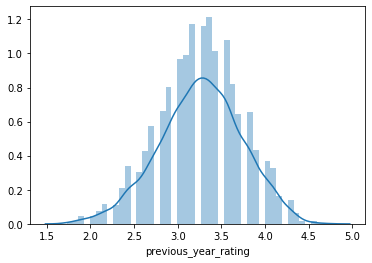

In [34]:
sns.distplot(imputedRatings)

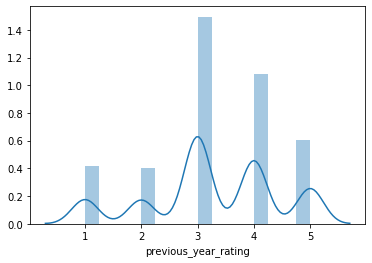

In [35]:
sns.distplot(train['previous_year_rating'][train['length_of_service']==1])

In [36]:
x_train['previous_year_rating'][10]

2.909090909090909

### Train Validation Spliting

75:25

In [94]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=12)

## Basemodel

In [0]:
from sklearn.linear_model import LogisticRegression

logr_pipe = make_pipeline( LogisticRegression(solver='lbfgs',max_iter=100))
model_Lr=logr_pipe.fit(X_train, Y_train)

C:\Users\ilaks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut
from sklearn import metrics

In [0]:
y_pred = model_Lr.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 92.13%
Balanced Accuracy: 58.16%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12533
           1       0.65      0.17      0.27      1169

    accuracy                           0.92     13702
   macro avg       0.79      0.58      0.62     13702
weighted avg       0.90      0.92      0.90     13702



col_0            0    1
is_promoted            
0            12423  110
1              968  201

In [0]:
mythreshold=0.1
y_pred = (model_Lr.predict_proba(X_val) >= mythreshold).astype(int)
#y_pred = model_Lr.predict(X_val)
y_pred=y_pred[:,1]
#y_pred
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 78.05%
Balanced Accuracy: 73.57%
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     12533
           1       0.23      0.68      0.35      1169

    accuracy                           0.78     13702
   macro avg       0.60      0.74      0.61     13702
weighted avg       0.90      0.78      0.82     13702



col_0           0     1
is_promoted            
0            9897  2636
1             372   797

## SMOTE

In [112]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [40]:
sm = SMOTE(random_state=0,sampling_strategy=0.9)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, Y_train)

In [0]:
logr_pipe = make_pipeline( LogisticRegression(solver='lbfgs',max_iter=100))
model_Lr=logr_pipe.fit(X_SMOTE, y_SMOTE)

C:\Users\ilaks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
y_SMOTE.sum()

33846

In [0]:
mythreshold=0.48
y_pred = (model_Lr.predict_proba(X_val) >= mythreshold).astype(int)
#y_pred = model_Lr.predict(X_val)
y_pred=y_pred[:,1]
#y_pred
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 75.42%
Balanced Accuracy: 74.58%
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     12533
           1       0.22      0.74      0.34      1169

    accuracy                           0.75     13702
   macro avg       0.59      0.75      0.59     13702
weighted avg       0.90      0.75      0.81     13702



col_0           0     1
is_promoted            
0            9474  3059
1             309   860

In [0]:
#
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
model_gbt = clf.fit(X_SMOTE, y_SMOTE)
# clf.predict(X_test[:2])
# clf.score(X_SMOTE, Y_SMOTE)

In [20]:
y_pred = model_gbt.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 92.64%
Balanced Accuracy: 63.21%
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12533
           1       0.67      0.28      0.39      1169

    accuracy                           0.93     13702
   macro avg       0.80      0.63      0.68     13702
weighted avg       0.91      0.93      0.91     13702



col_0            0    1
is_promoted            
0            12370  163
1              845  324

In [0]:
grid_values = {'n_estimators': [500,100],'min_samples_split':[250,300,350],'min_samples_leaf':[50],'max_depth':[5,6], 'max_features':['sqrt']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1',cv=3,n_jobs=-1)
model_gbt_cv = grid_clf_acc.fit(X_SMOTE, y_SMOTE)
y_pred_acc = model_gbt_cv.predict(X_val)

In [27]:
y_pred = model_gbt_cv.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 93.85%
Balanced Accuracy: 66.39%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12533
           1       0.86      0.33      0.48      1169

    accuracy                           0.94     13702
   macro avg       0.90      0.66      0.72     13702
weighted avg       0.93      0.94      0.93     13702



col_0            0    1
is_promoted            
0            12471   62
1              780  389

In [28]:
model_gbt_cv.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 350,
 'n_estimators': 500}

In [0]:
#250-500 min_sample_split  0.5-1% of total data
#min_samples_leaf = 50
#max_depth = 8 .. should be 5-8
#max_features = ‘sqrt’


In [92]:
#
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)

In [42]:
grid_values = {'n_estimators': [500],'min_samples_split':[2,3,5,10,50,100,350],'min_samples_leaf':[2,3,5,10,20,50],'max_depth':[4,5,6,7,10], 'max_features':[6,7,8,9]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1',cv=3,n_jobs=-1,verbose=1)
model_gbt_cv = grid_clf_acc.fit(X_SMOTE, y_SMOTE)
y_pred_acc = model_gbt_cv.predict(X_val)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 47.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 75.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 123.4min
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed: 131.7min finished


In [43]:
model_gbt_cv.best_params_

{'max_depth': 6,
 'max_features': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 350,
 'n_estimators': 500}

In [44]:
model_gbt_cv.cv_results_

{'mean_fit_time': array([21.16524736, 21.29542263, 21.29542613, 20.89781618, 21.54744713,
        21.19167113, 21.46898937, 21.4514161 , 21.81717483, 22.2436409 ,
        22.05980905, 21.90868123, 21.35167209, 20.97541746, 21.53588788,
        21.30393871, 20.80901734, 20.97769181, 20.77641749, 20.72436889,
        20.26428866, 20.35482939, 20.49092261, 20.71826951, 20.53915381,
        20.48204001, 20.47978131, 20.27532307, 20.44683305, 20.65889692,
        20.70733364, 21.07297556, 20.27908071, 20.25605734, 20.3353107 ,
        20.43165731, 20.08964507, 20.35605597, 20.22920903, 20.53932858,
        19.81878408, 20.15768361, 22.49383616, 22.73071615, 22.23091364,
        22.3905623 , 22.34957671, 22.28369768, 22.22800962, 22.23434718,
        22.27615937, 22.45166286, 22.40662964, 22.0289185 , 22.11043795,
        22.26733128, 22.46276736, 22.46023575, 22.64063533, 22.5691967 ,
        22.21849656, 22.37733364, 22.17658798, 22.51501179, 22.10801593,
        22.55933825, 22.46194442, 

In [45]:
y_pred = model_gbt_cv.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 94.05%
Balanced Accuracy: 67.7%
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12533
           1       0.86      0.36      0.51      1169

    accuracy                           0.94     13702
   macro avg       0.90      0.68      0.74     13702
weighted avg       0.94      0.94      0.93     13702



col_0            0    1
is_promoted            
0            12467   66
1              749  420

In [47]:
grid_values = {'n_estimators': [500],'min_samples_split':[2,5,10,350,500],'min_samples_leaf':[1,2,3,5,10,20],'max_depth':[4,5,6,7,8], 'max_features':[7,8,9,10,12]}
grid_clf_acc2 = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1',cv=3,n_jobs=-1,verbose=1)
model_gbt_cv2 = grid_clf_acc2.fit(x_train, y_train)


Fitting 3 folds for each of 750 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 73.5min finished


In [48]:
model_gbt_cv.best_params_

{'max_depth': 6,
 'max_features': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 350,
 'n_estimators': 500}

In [49]:
model_gbt_cv.cv_results_

{'mean_fit_time': array([21.16524736, 21.29542263, 21.29542613, 20.89781618, 21.54744713,
        21.19167113, 21.46898937, 21.4514161 , 21.81717483, 22.2436409 ,
        22.05980905, 21.90868123, 21.35167209, 20.97541746, 21.53588788,
        21.30393871, 20.80901734, 20.97769181, 20.77641749, 20.72436889,
        20.26428866, 20.35482939, 20.49092261, 20.71826951, 20.53915381,
        20.48204001, 20.47978131, 20.27532307, 20.44683305, 20.65889692,
        20.70733364, 21.07297556, 20.27908071, 20.25605734, 20.3353107 ,
        20.43165731, 20.08964507, 20.35605597, 20.22920903, 20.53932858,
        19.81878408, 20.15768361, 22.49383616, 22.73071615, 22.23091364,
        22.3905623 , 22.34957671, 22.28369768, 22.22800962, 22.23434718,
        22.27615937, 22.45166286, 22.40662964, 22.0289185 , 22.11043795,
        22.26733128, 22.46276736, 22.46023575, 22.64063533, 22.5691967 ,
        22.21849656, 22.37733364, 22.17658798, 22.51501179, 22.10801593,
        22.55933825, 22.46194442, 

In [68]:
y_pred = model_gbt_cv2.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.f1_score(Y_val, y_pred)*100, 2)}%")
print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 94.91%
Balanced Accuracy: 70.85%
Balanced Accuracy: 58.39%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     12533
           1       0.97      0.42      0.58      1169

    accuracy                           0.95     13702
   macro avg       0.96      0.71      0.78     13702
weighted avg       0.95      0.95      0.94     13702



col_0            0    1
is_promoted            
0            12516   17
1              680  489

In [ ]:
# Acc=[]
# balAcc=[]
# f1=[]
# for val in range(1,11):
    
#     sm = SMOTE(random_state=0,sampling_strategy=0.1*val)
#     X_SMOTE, y_SMOTE = sm.fit_resample(X_train, Y_train)
    
#     print(X_SMOTE.shape)
#     print(y_SMOTE.shape)
    
#     clf = GradientBoostingClassifier(random_state=0,max_depth=6, max_features= 9,min_samples_leaf= 2,min_samples_split= 350,n_estimators= 500)
    
#     clf.fit(X_SMOTE, y_SMOTE)
#     y_pred = clf.predict(X_val)
#     Acc.append(metrics.accuracy_score(Y_val, y_pred)*100)
#     balAcc.append(metrics.balanced_accuracy_score(Y_val, y_pred)*100)
#     f1.append(metrics.f1_score(Y_val, y_pred)*100)
    
#     #print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")
#     print(f"Balanced Accuracy: {round(metrics.f1_score(Y_val, y_pred)*100, 2)}%")
    

In [91]:
from sklearn import preprocessing

In [103]:
clf = GradientBoostingClassifier(random_state=0,max_depth=6, max_features= 9,min_samples_leaf= 2,min_samples_split= 360,n_estimators= 500,)
gbt_pipe2 = Pipeline([('stdScaler',preprocessing.MaxAbsScaler()),('classifier', clf)])
gbt_pipe2.fit(x_train, y_train)
y_pred = gbt_pipe2.predict(X_val)
#Acc.append(metrics.accuracy_score(Y_val, y_pred)*100)
#balAcc.append(metrics.balanced_accuracy_score(Y_val, y_pred)*100)
#f1.append(metrics.f1_score(Y_val, y_pred)*100)
print(f"Balanced Accuracy: {round(metrics.f1_score(Y_val, y_pred)*100, 2)}%")

Balanced Accuracy: 56.85%


In [104]:
print(f"Balanced Accuracy: {round(metrics.f1_score(Y_val, y_pred)*100, 10)}%")

Balanced Accuracy: 56.8497284249%


In [187]:
gbt_pipe

Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(max_depth=6, max_features=9,
                                            min_samples_leaf=2,
                                            min_samples_split=350,
                                            n_estimators=500,
                                            random_state=0))])

# KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
#SMOTE
sm = SMOTE(random_state=0,sampling_strategy=0.9)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, Y_train)

In [115]:

from sklearn.preprocessing import StandardScaler
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=51))
knn_pipe.fit(X_SMOTE, y_SMOTE)
# knn_clf = KNeighborsClassifier(n_neighbors=51)
# knn_clf.fit(X_SMOTE, y_SMOTE)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=51))])

In [116]:
y_pred = knn_pipe.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.f1_score(Y_val, y_pred)*100, 2)}%")
print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 84.12%
Balanced Accuracy: 65.96%
Balanced Accuracy: 32.13%
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     12533
           1       0.25      0.44      0.32      1169

    accuracy                           0.84     13702
   macro avg       0.60      0.66      0.62     13702
weighted avg       0.88      0.84      0.86     13702



col_0            0     1
is_promoted             
0            11011  1522
1              654   515

## Catboost

In [122]:
from catboost import CatBoostClassifier
import timeit

def train_on_cpu():  
  model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.03
  )
  
  model.fit(
      x_train, y_train,
      eval_set=(X_val, Y_val),
      verbose=10
  );   
      
cpu_time = timeit.timeit('train_on_cpu()', 
                         setup="from __main__ import train_on_cpu", 
                         number=1)

print('Time to fit model on CPU: {} sec'.format(int(cpu_time)))

0:	learn: 0.6437243	test: 0.6434129	best: 0.6434129 (0)	total: 71.7ms	remaining: 7.1s
10:	learn: 0.3803608	test: 0.3794094	best: 0.3794094 (10)	total: 207ms	remaining: 1.68s
20:	learn: 0.2766922	test: 0.2756350	best: 0.2756350 (20)	total: 344ms	remaining: 1.29s
30:	learn: 0.2283211	test: 0.2272524	best: 0.2272524 (30)	total: 470ms	remaining: 1.04s
40:	learn: 0.2023101	test: 0.2011812	best: 0.2011812 (40)	total: 619ms	remaining: 891ms
50:	learn: 0.1903175	test: 0.1892271	best: 0.1892271 (50)	total: 751ms	remaining: 722ms
60:	learn: 0.1810522	test: 0.1798213	best: 0.1798213 (60)	total: 881ms	remaining: 564ms
70:	learn: 0.1762174	test: 0.1749706	best: 0.1749706 (70)	total: 1.01s	remaining: 412ms
80:	learn: 0.1731446	test: 0.1719067	best: 0.1719067 (80)	total: 1.14s	remaining: 268ms
90:	learn: 0.1707310	test: 0.1695303	best: 0.1695303 (90)	total: 1.3s	remaining: 129ms
99:	learn: 0.1693506	test: 0.1681638	best: 0.1681638 (99)	total: 1.44s	remaining: 0us

bestTest = 0.1681638269
bestIteratio

In [123]:
def train_on_gpu():  
  model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.03,
    task_type='GPU'
  )

    
  
  model.fit(
     x_train, y_train,
      eval_set=(X_val, Y_val),
      verbose=10
  );     
      
gpu_time = timeit.timeit('train_on_gpu()', 
                         setup="from __main__ import train_on_gpu", 
                         number=1)

print('Time to fit model on GPU: {} sec'.format(int(gpu_time)))
print('GPU speedup over CPU: ' + '%.2f' % (cpu_time/gpu_time) + 'x')

0:	learn: 0.6431445	test: 0.6429494	best: 0.6429494 (0)	total: 16.7ms	remaining: 1.65s
10:	learn: 0.3704543	test: 0.3696230	best: 0.3696230 (10)	total: 117ms	remaining: 944ms
20:	learn: 0.2668146	test: 0.2659239	best: 0.2659239 (20)	total: 205ms	remaining: 770ms
30:	learn: 0.2182647	test: 0.2172213	best: 0.2172213 (30)	total: 296ms	remaining: 659ms
40:	learn: 0.1951705	test: 0.1940342	best: 0.1940342 (40)	total: 383ms	remaining: 551ms
50:	learn: 0.1840918	test: 0.1829410	best: 0.1829410 (50)	total: 473ms	remaining: 454ms
60:	learn: 0.1781885	test: 0.1770544	best: 0.1770544 (60)	total: 559ms	remaining: 357ms
70:	learn: 0.1737938	test: 0.1726547	best: 0.1726547 (70)	total: 646ms	remaining: 264ms
80:	learn: 0.1706239	test: 0.1695407	best: 0.1695407 (80)	total: 735ms	remaining: 172ms
90:	learn: 0.1686591	test: 0.1675893	best: 0.1675893 (90)	total: 835ms	remaining: 82.6ms
99:	learn: 0.1673943	test: 0.1663833	best: 0.1663833 (99)	total: 931ms	remaining: 0us
bestTest = 0.1663832792
bestIterat

In [ ]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

# Writing to result to CSV

In [ ]:
molelPipe=knn_pipe
y_pred = molelPipe.predict(X_test)
test['employee_id']

In [ ]:
result=pd.DataFrame()
result['employee_id']=test['employee_id']
result['is_promoted']=y_pred
result

In [ ]:
result.to_csv("base_result4.csv",index=False)